In [42]:
ls

Assignment_3.ipynb  dataset/  flower.h5  flowers/  Flowers-Dataset.zip


In [ ]:
cd /content/drive/MyDrive/CNN

In [44]:
ls

Assignment_3.ipynb  dataset/  flower.h5  flowers/  Flowers-Dataset.zip


In [ ]:
pwd

In [ ]:
!unzip Flowers-Dataset.zip

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [65]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [66]:
test_datagen= ImageDataGenerator(rescale=1./255)

In [67]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/dataset/training", target_size=(64,64), class_mode="categorical", batch_size=24)

Found 4327 images belonging to 5 classes.


In [68]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/dataset/testing", target_size=(64,64), class_mode="categorical", batch_size=24)

Found 621 images belonging to 5 classes.


Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation = "relu", input_shape = (64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300, activation="relu"))

In [ ]:
model.add(Dense(300, activation="relu"))

In [ ]:
model.add(Dense(5, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
len(x_train)

181

In [43]:
model.fit(x_train, epochs = 5, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/5
181/181 [==============================] - 748s 4s/step - loss: 1.1247 - accuracy: 0.5429 - val_loss: 0.9137 - val_accuracy: 0.6473
Epoch 2/5
181/181 [==============================] - 45s 249ms/step - loss: 0.9867 - accuracy: 0.6120 - val_loss: 0.8481 - val_accuracy: 0.6876
Epoch 3/5
181/181 [==============================] - 45s 247ms/step - loss: 0.9282 - accuracy: 0.6388 - val_loss: 1.0233 - val_accuracy: 0.5845
Epoch 4/5
181/181 [==============================] - 46s 251ms/step - loss: 0.8909 - accuracy: 0.6550 - val_loss: 0.7821 - val_accuracy: 0.6908
Epoch 5/5
181/181 [==============================] - 46s 252ms/step - loss: 0.8472 - accuracy: 0.6718 - val_loss: 0.7169 - val_accuracy: 0.7456


In [45]:
model.save("flower.h5")

Testing the Model

In [46]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


In [47]:
model = load_model("/content/drive/MyDrive/CNN/flower.h5")

In [48]:
img = image.load_img("/content/drive/MyDrive/CNN/dataset/training/rose/11233672494_d8bf0a3dbf_n.jpg",target_size=(64,64))

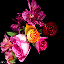

In [49]:
img

In [51]:
x=image.img_to_array(img)

In [52]:
x

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[  2.,   1.,   6.],
        [ 83.,  83.,  81.],
        [ 92.,  92.,  92.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ 39.,  39.,  41.],
        [ 82.,  82.,  84.],
        [196., 196., 196.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ 10.,   9.,  15.],
        [  4.,   4.,   4.],
        [  4.,  

In [53]:
x.ndim

3

In [54]:
x = np.expand_dims(x, axis = 0)

In [55]:
x.ndim

4

In [56]:
pred = model.predict(x)

In [57]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [61]:
labels = ["daisy","dandelion","rose","sunflower","tulip"]

In [62]:
np.argmax(pred)

2

In [63]:
labels[np.argmax(pred)]

'rose'